In [42]:
!pip install pytextrank wordcloud matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import requests
from bs4 import BeautifulSoup
import spacy
import string
from nltk.tokenize import word_tokenize
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import pytextrank
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [44]:
# Download the 'punkt' resource
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [45]:
def wikiscrape(url):
    # Get URL
    page = requests.get(url)

    # Scrape webpage
    soup = BeautifulSoup(page.content, 'html.parser')

    # Find all occurrences of p in HTML
    # Includes HTML tags
    paragraphs = soup.find_all('p')

    # Remove square brackets and their contents using regular expressions
    pattern = re.compile(r'\[[^\]]*\]')
    content = ""
    for p in paragraphs:
        cleaned_text = re.sub(pattern, '', p.get_text())
        content += cleaned_text.lower()

    return content

In [46]:
def lemmatize_and_get_forms(word):
    lemmatizer = WordNetLemmatizer()
    forms = set()
    forms.add(lemmatizer.lemmatize(word))
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            forms.add(lemma.name())
    return forms

In [47]:
def textrank(text, ignore_words, keep_words):
    # Remove punctuation except hyphen
    translator = str.maketrans("", "", string.punctuation.replace("-", ""))
    text = text.translate(translator)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Create the 'nlp' object
    nlp = spacy.load("en_core_web_sm")
    nlp.add_pipe("textrank")

    # Remove stopwords
    tokens = [token for token in tokens if token.lower() not in nlp.Defaults.stop_words]

    # Reconstruct the modified text
    modified_text = " ".join(tokens)

    # Get all possible word forms for the words in keep_words
    final_forms = set()
    if keep_words:
      for word in keep_words:
          word_forms = lemmatize_and_get_forms(word)
          print(f"Word: {word} ; Word-forms: {word_forms}")
          final_forms.update(word_forms)

    print(f"\nAll Word Forms: {final_forms}\n")

    # Apply TextRank algorithm
    doc = nlp(modified_text)

    # Get the keyword phrases
    keywords = [phrase.text for phrase in doc._.phrases]

    # Filter out keywords that contain ignore words
    filtered_keywords = [keyword for keyword in keywords if not any(word in keyword for word in ignore_words)]

    # Filter out keywords that do not contain any of the keep words or their forms
    if final_forms:
        filtered_keywords = [keyword for keyword in filtered_keywords if any(word in keyword for word in final_forms)]

    return filtered_keywords[:20]

In [48]:
def generate_word_cloud(keywords):
    # Join the keywords into a single string
    text = " ".join(keywords)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


Enter the last part of the Wikipedia URL (e.g., 'hotflashes'): vani_sateesh
Enter the words to ignore in the final keyword list, separated by hyphens: vani-sateesh
Enter the words to keep in the final keyword list, separated by hyphens: 1

All Word Forms: set()

Filtered Keywords:
1. reasons message


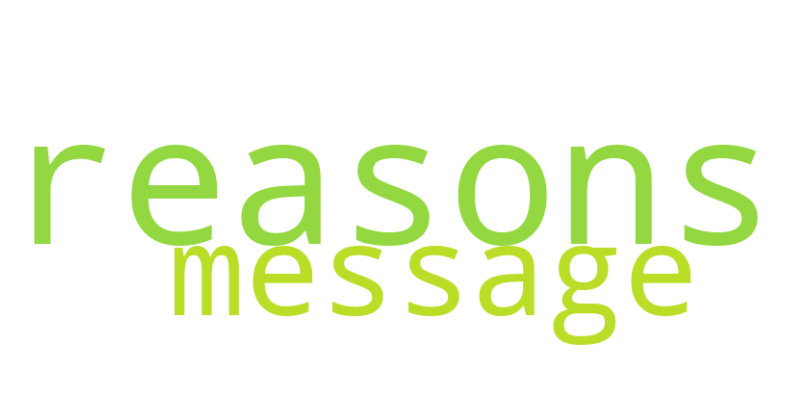


Enter the last part of the Wikipedia URL (e.g., 'hotflashes'): substance_abuse
Enter the words to ignore in the final keyword list, separated by hyphens: substance-abuse
Enter the words to keep in the final keyword list, separated by hyphens: 1

All Word Forms: set()

Filtered Keywords:
1. certain types drug use drugs
2. alcohol drugs
3. initiation drug use
4. alcohol prescription drugs
5. drug countries
6. drug
7. drugs
8. prescription drugs
9. drugs suicide
10. tolerance drugs
11. illegal drugs
12. drug overdoses
13. prescription drugs prescription
14. drug illegal countries
15. drug legislation
16. multiple drugs
17. experimentation drugs
18. drugs males
19. illegal drug use united states
20. notable drug


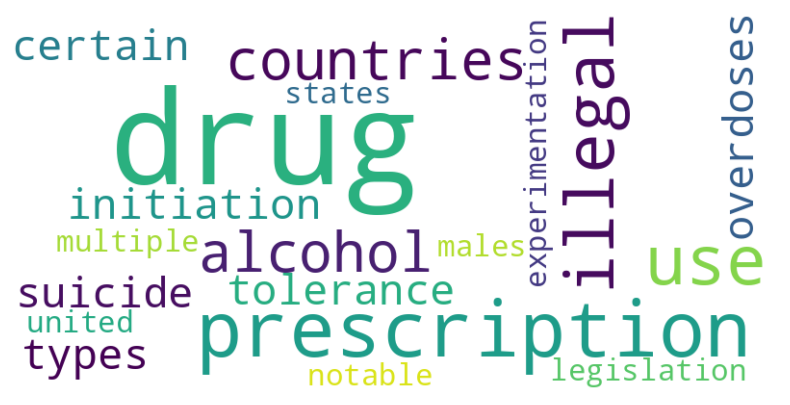

In [ ]:
while True:
    # Input URL
    last_part = input("Enter the last part of the Wikipedia URL (e.g., 'hotflashes'): ")
    if last_part == '1':
        break

    url = "https://en.wikipedia.org/wiki/" + last_part

    # Customized stopwords specific to your problem
    custom_stopwords = ["a", "an", "the"]

    # Words to ignore in the final keyword list
    ignore_words_input = input("Enter the words to ignore in the final keyword list, separated by hyphens: ")
    ignore_words = ignore_words_input.split("-") if ignore_words_input != '1' else []

    # Words to keep in the final keyword list
    keep_words_input = input("Enter the words to keep in the final keyword list, separated by hyphens: ")
    keep_words = keep_words_input.split("-") if keep_words_input != '1' else []

    # Calling wikiscrape()
    article_text = wikiscrape(url)

    # Apply TextRank algorithm
    filtered_keywords = textrank(article_text, ignore_words, keep_words)

    # Print the filtered keywords
    if filtered_keywords:
        print("Filtered Keywords:")
        count = 1
        for keyword in filtered_keywords:
            print(f"{count}. {keyword}")
            count += 1
    else:
        print("No keywords found.")

    # Generate and display the word cloud
    generate_word_cloud(filtered_keywords)

    print()

print("Exiting the program.")